# Aviation Accidents

In [ ]:
pip install geopandas matplotlib

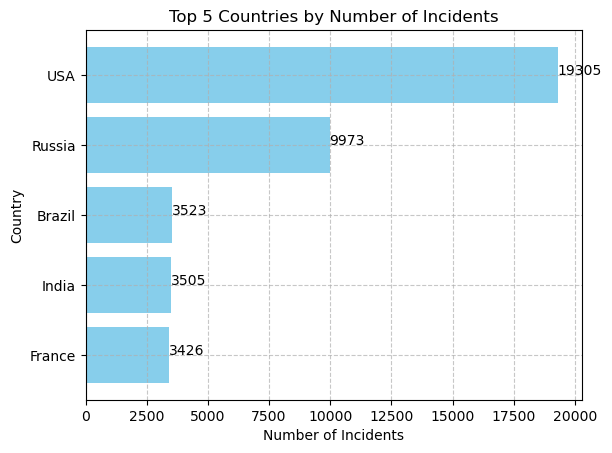

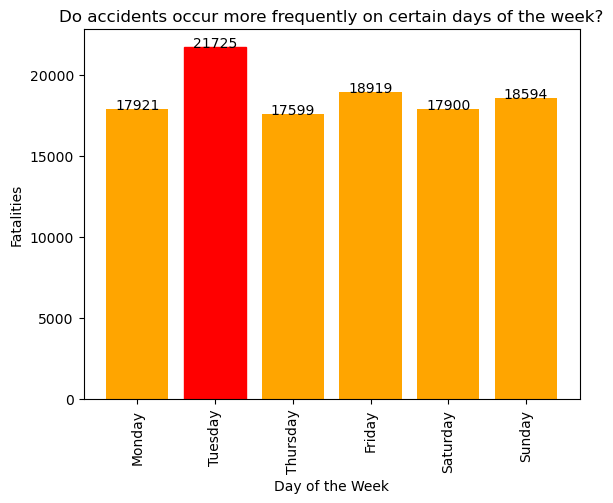

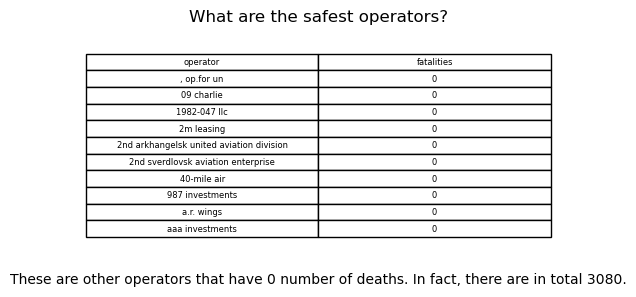

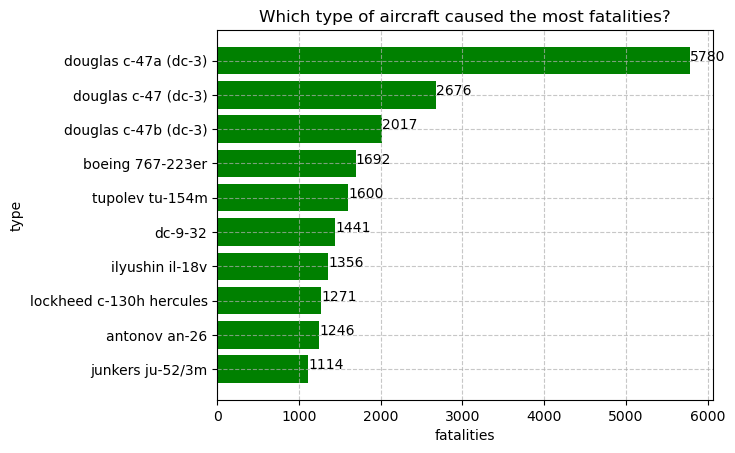

/Users/zanetti/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/zanetti/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


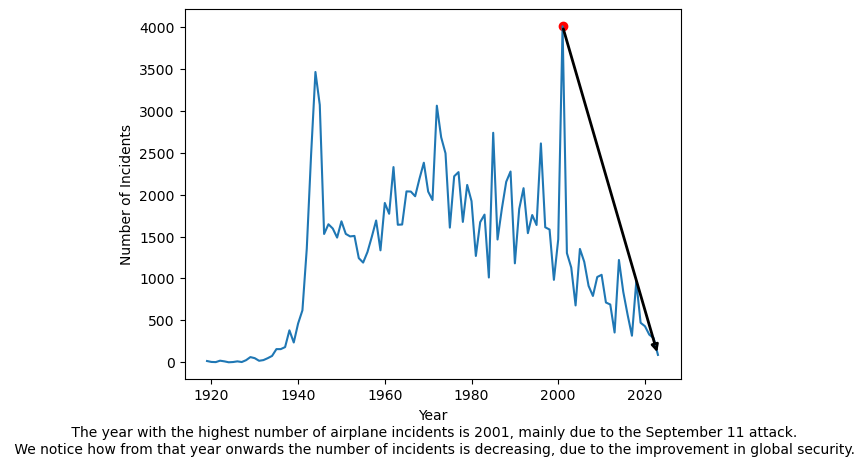

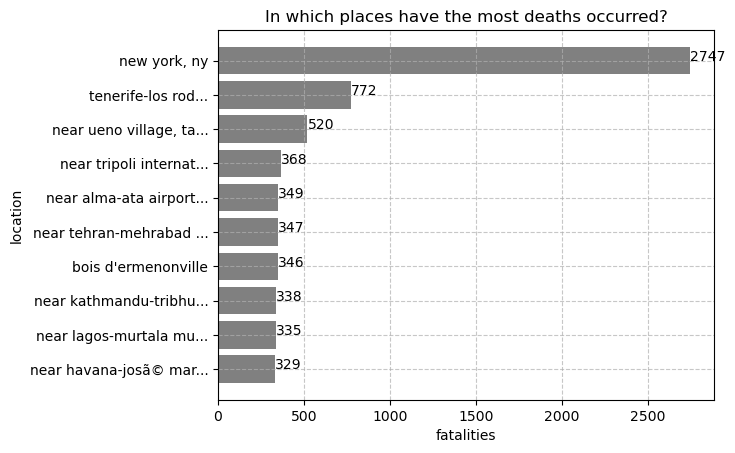

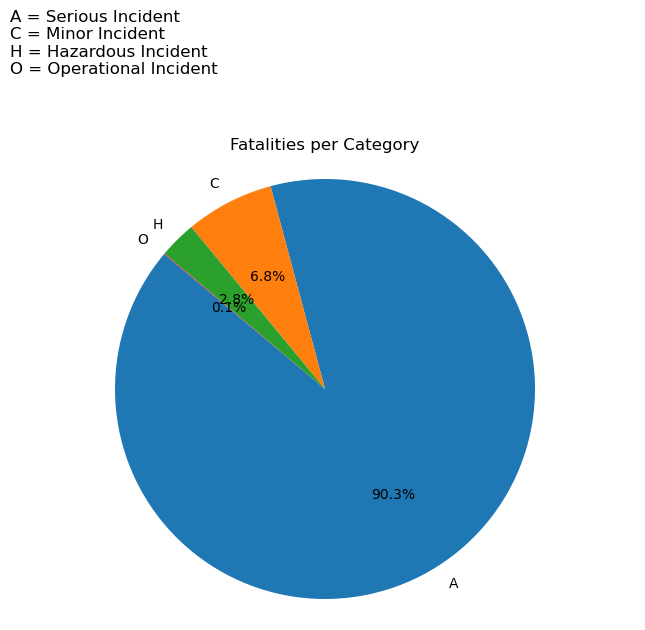

/var/folders/my/8mv2j4_n7b12hfdkp7t2bzgh0000gn/T/ipykernel_98013/1331278107.py:161: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


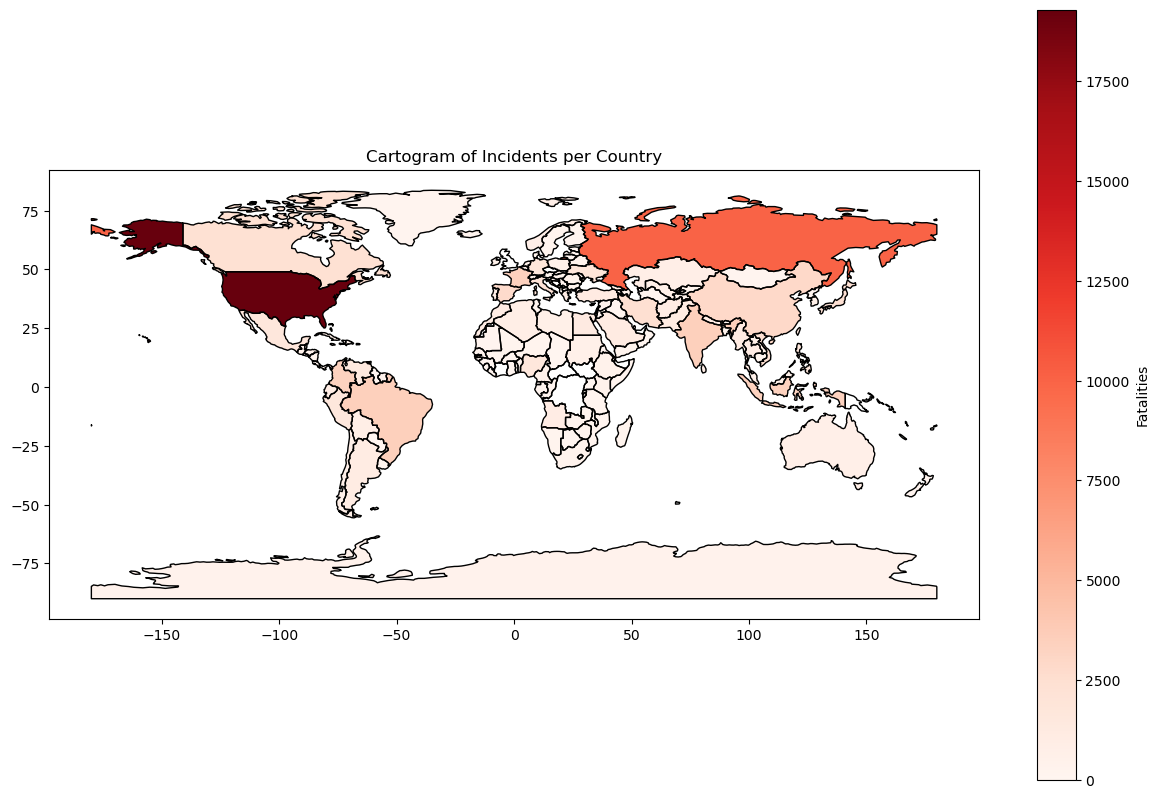

,date,type,registration,operator,fatalities,location,country,cat,year
0,1919-08-02,caproni ca.48,not found,caproni,14,verona,Italy,A1,1919
1,1919-08-11,felixstowe fury,n123,raf,1,near felixtowe rnas,U.K.,A1,1919
2,1920-02-23,handley page o/7,g-eanv,handley page transport,0,"acadia siding, c...",South Africa,A1,1920
3,1920-02-25,handley page o/400,g-eamc,handley page transport,0,near el shereik,Sudan,A1,1920
4,1920-06-30,handley page o/400,g-eake,handley page transport,0,ãstanã¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23872,2023-04-13,airbus a330-243,c-gubl,air transat,0,miami internatio...,USA,A2,2023
23873,2023-04-13,boeing 777-31her,a6-egh,emirates,0,miami internatio...,USA,A2,2023
23874,2023-04-14,bae 3112 jetstream 31,c-fcpe,northwestern air lease,0,fort smith airpo...,Canada,A2,2023
23876,2023-04-15,boeing 737-86q (wl),ur-sqh,"skyup airlines, opf sun air company",0,khartoum interna...,Sudan,O1,2023


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
import geopandas as gpd

def check():
    print(data.isna().sum())
    print(data.info())
    print(data.shape)

def evaluate_incidents(inc):
    """
    Converts incidents string like "5 + 2" to a single number
    """
    try:
        if pd.isna(inc):
            return 0
        else:
            return eval(inc)
    except:
        return 0

# Data cleaning
# Read the .csv file, considering all characters in " " as a single word (including commas)
data = pd.read_csv("aviation-accidents.csv", delimiter=',', quotechar='"')
# Drop rows with missing data and reset the index
data = data.drop(range(0, 61)).reset_index(drop=True)
# Convert all columns to more appropriate types
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')
data["type"] = data["type"].str.lower()
data["registration"] = data["registration"].str.lower()
data["registration"].fillna("not found", inplace=True)
data["operator"] = data["operator"].str.lower()
data["operator"].fillna("not found", inplace=True)
data["location"] = data["location"].str.lower()
data["location"].fillna("not found", inplace=True)
data['fatalities'] = data['fatalities'].apply(evaluate_incidents)
data["fatalities"] = data["fatalities"].astype(int)
data["cat"] = data["cat"].astype("category")
data["country"] = data["country"].astype("category")
data["year"].fillna(0, inplace=True)
data['year'] = data['year'].apply(evaluate_incidents)

# Data analysis and visualization
data = data.sort_values(by='year')


data1 = data.groupby('country')['fatalities'].sum().reset_index()
top_5 = data1.sort_values(by='fatalities').tail(5)
plt.barh(top_5['country'], top_5['fatalities'], color='skyblue')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.title('Top 5 Countries by Number of Incidents')
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in enumerate(top_5['fatalities']):
    plt.text(value, index, str(value))
plt.show()


data2 = data.copy()
selected_columns = ['date', 'fatalities']
data2 = data2.drop(columns=[col for col in data2.columns if col not in selected_columns])
data2["date"] = data2["date"].dt.dayofweek
data2["date"] = data2["date"].fillna(-1).astype(int)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data2['date'] = data2['date'].map(lambda x: day_names[x] if x != -1 else "Unknown")
data2 = data2.groupby('date')['fatalities'].sum().reset_index()
data2 = data2.drop(7)
data2 = data2.rename(columns={'date': 'days_of_the_week'})
day_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data2['day_order'] = data2['days_of_the_week'].map(day_order)
data2 = data2.sort_values(by='day_order')
data2.insert(0, 'day_order', data2.pop('day_order'))
data2 = data2[data2['days_of_the_week'] != 'Unknown']

max_fatalities_day = data2.loc[data2['fatalities'].idxmax(), 'days_of_the_week']
bars = plt.bar(data2['days_of_the_week'], data2['fatalities'], color='orange')
bars[data2['days_of_the_week'].tolist().index(max_fatalities_day)].set_color('red')

for i, v in enumerate(data2['fatalities']):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.title('Do accidents occur more frequently on certain days of the week?')
plt.xlabel('Day of the Week')
plt.ylabel('Fatalities')
plt.xticks(rotation=90)
plt.show()


data3 = data.groupby('operator')['fatalities'].sum().reset_index()
data3 = data3[data3['fatalities'] == 0]
five = data3.head(10)
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
tabla = ax.table(cellText=five.values, colLabels=data3.columns, loc='center', cellLoc='center')
plt.title("What are the safest operators?")
plt.text(0.5, -0.1, f"These are other operators that have 0 number of deaths. In fact, there are in total {len(data3)}.", ha='center', fontsize=10)
plt.show()


data4 = data.groupby('type')['fatalities'].sum().reset_index()
data4 = data4[data4['fatalities'] > 0].reset_index()
top = data4.sort_values(by='fatalities').tail(10)
plt.barh(top['type'], top['fatalities'], color='green')
plt.xlabel('fatalities')
plt.ylabel("type")
plt.title('Which type of aircraft caused the most fatalities?')
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in enumerate(top['fatalities']):
    plt.text(value, index, str(value))
plt.show()


data5 = data.groupby('year')['fatalities'].sum().reset_index()
plt.plot(data5["year"], data5["fatalities"], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.scatter(2001, data5[data5['year'] == 2001]['fatalities'], color='red', marker='o', label='2001')
plt.annotate('', xy=(2023, data5[data5['year'] == 2023]['fatalities']), xytext=(2001, data5[data5['year'] == 2001]['fatalities']),
             arrowprops=dict(arrowstyle='-|>', linewidth=2))
plt.text(0.5, -0.2, " The year with the highest number of airplane incidents is 2001, mainly due to the September 11 attack.\n \
We notice how from that year onwards the number of incidents is decreasing, due to the improvement in global security." ,ha='center', fontsize=10, transform=plt.gca().transAxes)
plt.show()


data6 = data.groupby('location')['fatalities'].sum().reset_index()
index_to_drop = data6[data6['location'] == 'not found'].index
data6 = data6.drop(index_to_drop)
data6 = data6[data6['fatalities'] > 0]
data6 = data6.sort_values(by='fatalities').tail(10)
plt.barh(data6['location'], data6['fatalities'], color='grey')
plt.xlabel('fatalities')
plt.ylabel("location")
plt.title("What are the locations with the highest number of deaths?")
plt.title('In which places have the most deaths occurred?')
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in enumerate(data6['fatalities']):
    plt.text(value, index, str(value))
plt.show()


data7 = data.groupby('cat')['fatalities'].sum().reset_index()
data7['cat'] = data7['cat'].replace({'A1': 'A', 'A2': 'A'})
data7 = data7.groupby('cat', as_index=False).sum()
data7['cat'] = data7['cat'].replace({'C1': 'C', 'C2': 'C'})
data7 = data7.groupby('cat', as_index=False).sum()
data7['cat'] = data7['cat'].replace({'H1': 'H', 'H2': 'H'})
data7 = data7.groupby('cat', as_index=False).sum()
data7['cat'] = data7['cat'].replace({'O1': 'O', 'O2': 'O'})
data7 = data7.groupby('cat', as_index=False).sum()
data7 = data7[data7['fatalities'] > 0]
plt.figure(figsize=(8, 6))
plt.pie(data7['fatalities'], labels=data7['cat'], autopct='%1.1f%%', startangle=140)
plt.title('Fatalities per Category')
plt.axis('equal')
text = "A = Serious Incident\nC = Minor Incident\nH = Hazardous Incident\nO = Operational Incident"
plt.text(-1.5, 1.5, text, fontsize=12)
plt.show()


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data8 = data1.copy()
data8 = data8.drop(0)
data8['country'].replace('USA', 'United States of America', inplace=True)
world = world.merge(data8, how='left', left_on='name', right_on='country')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='fatalities', ax=ax, legend=True, legend_kwds={'label': "Fatalities"}, cmap="Reds")
plt.title('Cartogram of Incidents per Country')
world.boundary.plot(ax=ax, linewidth=1, color='black')
plt.show()

"""
TO DO LIST:


"""


data